# Import libraries

Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

# Obtain Data

Read csv data to pandas and drop non-data columns

In [2]:
df = pd.read_csv('nba_draft_combine.csv')
df.head()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35


# Scrub Data

Create df.info overview of missing values and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                517 non-null    int64  
 1   Player                    517 non-null    object 
 2   Year                      517 non-null    int64  
 3   Draft pick                384 non-null    float64
 4   Height (No Shoes)         517 non-null    float64
 5   Height (With Shoes)       516 non-null    float64
 6   Wingspan                  517 non-null    float64
 7   Standing reach            517 non-null    float64
 8   Vertical (Max)            450 non-null    float64
 9   Vertical (Max Reach)      450 non-null    float64
 10  Vertical (No Step)        450 non-null    float64
 11  Vertical (No Step Reach)  450 non-null    float64
 12  Weight                    516 non-null    float64
 13  Body Fat                  514 non-null    float64
 14  Hand (Leng

In [4]:
df.drop(columns=['Unnamed: 0','Player','Year','Draft pick'], inplace=True)

Create correlation heatmap to find columns to remove

[Text(32.99999999999999, 0.5, 'Positions'),
 Text(0.5, 15.0, 'Positions'),
 Text(0.5, 1, 'NBA Draft Combine Measurements Correlation Heatmap')]

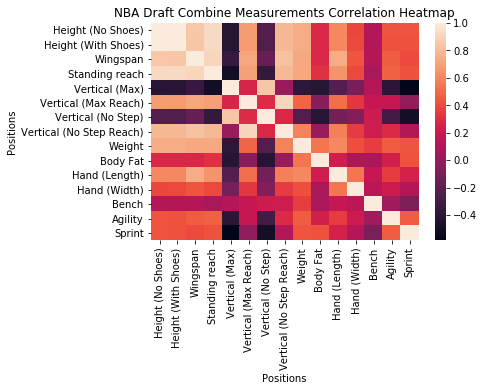

In [5]:
corr_matrix = df.corr()
heatmap = sns.heatmap(corr_matrix)
heatmap.set(Title='NBA Draft Combine Measurements Correlation Heatmap', xlabel='Positions', ylabel='Positions')


                          Height (No Shoes)  Height (With Shoes)  Wingspan  \
Height (No Shoes)                  1.000000             0.996147  0.846048   
Height (With Shoes)                0.996147             1.000000  0.845033   
Wingspan                           0.846048             0.845033  1.000000   
Standing reach                     0.921464             0.921300  0.907933   
Vertical (Max)                    -0.414731            -0.421709 -0.351612   
Vertical (Max Reach)               0.683416             0.678011  0.718613   
Vertical (No Step)                -0.242663            -0.249704 -0.166772   
Vertical (No Step Reach)           0.789036             0.787279  0.823541   
Weight                             0.741515             0.744684  0.728848   
Body Fat                           0.280845             0.281612  0.278265   
Hand (Length)                      0.607147             0.609598  0.743004   
Hand (Width)                       0.391396             0.394494

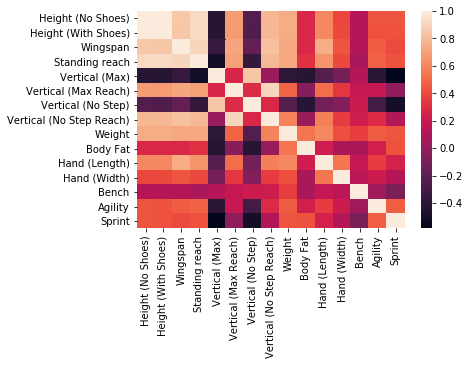

In [6]:
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix)

Drop correlated columns

In [7]:
df.drop(columns=['Bench','Height (With Shoes)', 'Vertical (Max Reach)', 'Vertical (No Step)',
                 'Vertical (No Step Reach)','Standing reach'], inplace=True)
df.dropna(inplace=True)

df.info to confirm that data has been scrubbed

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 15 to 516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Height (No Shoes)  394 non-null    float64
 1   Wingspan           394 non-null    float64
 2   Vertical (Max)     394 non-null    float64
 3   Weight             394 non-null    float64
 4   Body Fat           394 non-null    float64
 5   Hand (Length)      394 non-null    float64
 6   Hand (Width)       394 non-null    float64
 7   Agility            394 non-null    float64
 8   Sprint             394 non-null    float64
dtypes: float64(9)
memory usage: 30.8 KB


# Explore Data

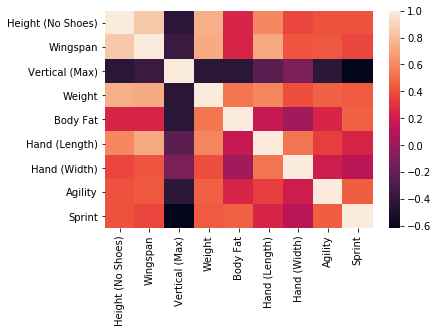

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [10]:
df.describe()

,Height (No Shoes),Wingspan,Vertical (Max),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
count,394.000000,394.000000,394.00000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,77.544416,82.486294,35.26269,214.492386,7.136548,8.715228,9.394670,11.348122,3.305381
std,3.271085,3.841678,3.65951,24.219127,2.376782,0.469932,0.736203,0.570065,0.129330
min,68.250000,70.750000,25.00000,149.000000,3.200000,7.500000,7.000000,10.070000,3.010000
25%,75.250000,79.812500,32.50000,197.000000,5.400000,8.500000,9.000000,10.950000,3.210000
50%,77.750000,82.500000,35.50000,213.000000,6.600000,8.750000,9.500000,11.280000,3.280000
75%,80.000000,85.437500,37.50000,231.000000,8.175000,9.000000,9.750000,11.680000,3.387500
max,85.250000,92.500000,44.50000,302.000000,16.400000,10.000000,12.000000,13.440000,3.810000


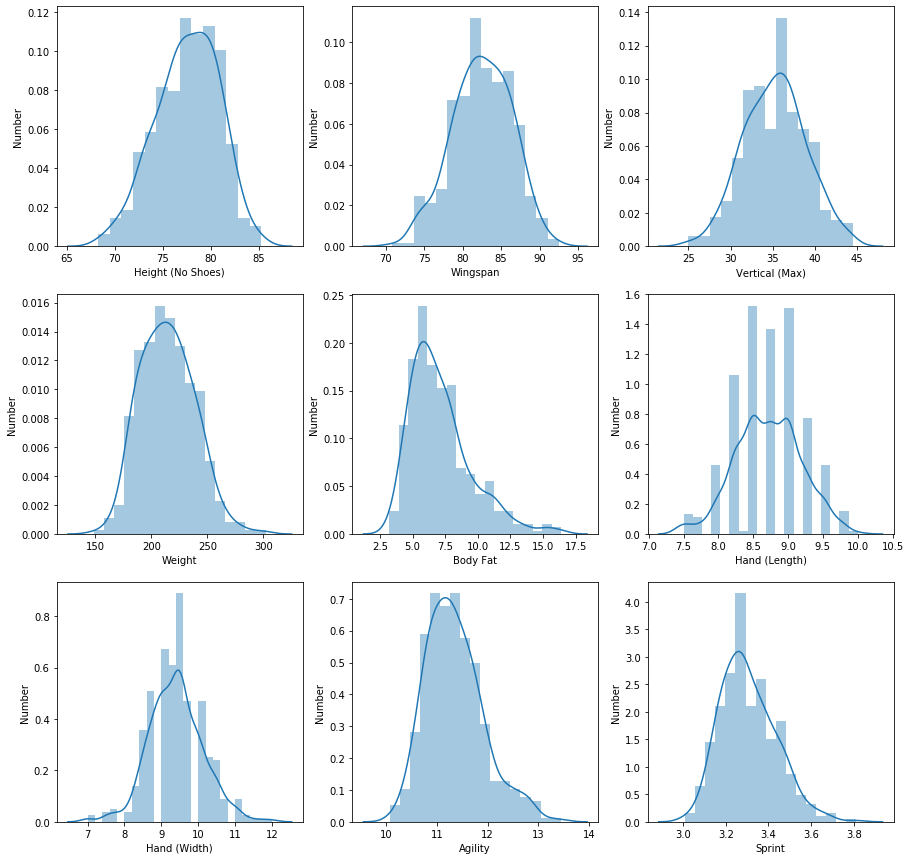

In [32]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
for index, col in enumerate(df.columns):
    sns.distplot(df[col], ax = ax[index//3][index%3])
    ax[index//3][index%3].set_ylabel('Number')

# Model Data

In [11]:
ss = StandardScaler()
ss.fit(df)
x = ss.transform(df)
x

array([[ 0.21597756,  0.5899984 ,  0.47534192, ..., -1.21679475,
        -0.20747095, -1.66747803],
       [-0.24316898, -0.84348802, -1.98713062, ..., -0.1967583 ,
        -0.38311245,  1.351903  ],
       [ 0.67512411,  0.39452298, -0.20867823, ...,  0.82327815,
         1.02201956,  0.26802263],
       ...,
       [-0.93188881, -0.45253718,  1.43297013, ...,  0.82327815,
         1.12740446, -0.04165748],
       [ 0.29250199, -1.42991428, -0.61909032, ..., -0.1967583 ,
         1.84753461,  1.73900313],
       [ 0.21597756, -0.06158633,  0.47534192, ..., -0.53677045,
        -0.2952917 , -0.35133758]])

Text(0, 0.5, 'Sum of Squared Distances')

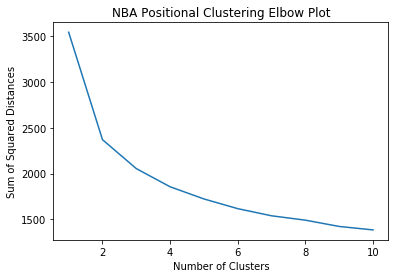

In [12]:
elbow_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    elbow_values.append([k, kmeans.inertia_])
elbow_df = pd.DataFrame(elbow_values, columns = ['K','Inertia'])
fig, ax = plt.subplots()
ax.plot(elbow_df['K'], elbow_df['Inertia'])
ax.set_title('NBA Positional Clustering Elbow Plot')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Sum of Squared Distances')

Text(0, 0.5, 'Number of Clusters')

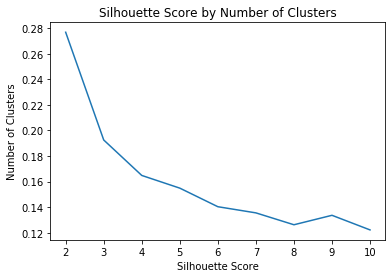

In [21]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    labels = kmeans.labels_
    sil_score = silhouette_score(x, labels)
    silhouette_scores.append([k, sil_score])
sil_df = pd.DataFrame(silhouette_scores, columns = ['K','Silhouette Score'])
fig, ax = plt.subplots()
ax.plot(sil_df['K'], sil_df['Silhouette Score'])
ax.set_title('Silhouette Score by Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

Text(0, 0.5, 'Distance')

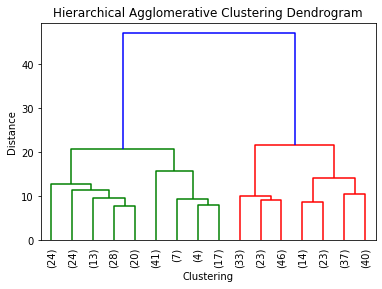

In [14]:
link = linkage(x, 'ward')
dendrogram(link, truncate_mode='lastp', p=16, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Clustering')
plt.ylabel('Distance')

In [15]:
df

,Height (No Shoes),Wingspan,Vertical (Max),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint
15,78.25,84.75,37.0,224.0,8.2,9.25,8.50,11.23,3.09
19,76.75,79.25,28.0,197.0,6.9,7.75,9.25,11.13,3.48
35,79.75,84.00,34.5,229.0,7.2,8.50,10.00,11.93,3.34
38,78.25,81.75,31.0,240.0,11.2,8.75,9.75,11.15,3.33
50,74.75,81.25,39.0,196.0,5.6,8.25,9.50,10.84,3.14
...,...,...,...,...,...,...,...,...,...
511,77.25,83.00,39.0,201.0,6.1,8.50,9.50,10.84,3.15
512,76.25,80.00,31.0,202.0,11.0,8.25,9.50,11.34,3.41
513,74.50,80.75,40.5,223.0,11.0,8.75,10.00,11.99,3.30
514,78.50,77.00,33.0,220.0,11.4,8.00,9.25,12.40,3.53


# Extra Work

In [16]:
g_df = df[['Height (No Shoes)', 'Weight']]
ss = StandardScaler()
ss.fit(g_df)
g_x = ss.transform(g_df)

In [17]:
g_x = pd.DataFrame(g_x, columns=['Height (No Shoes)', 'Weight'])
g_x.head()

,Height (No Shoes),Weight
0,0.215978,0.393065
1,-0.243169,-0.723173
2,0.675124,0.599776
3,0.215978,1.054540
4,-0.855364,-0.764516


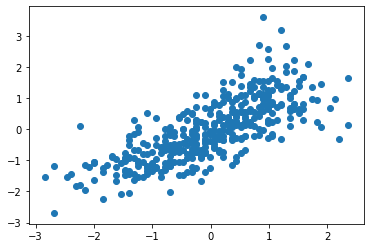

In [18]:
fig, ax = plt.subplots()
ax.scatter(g_x['Height (No Shoes)'],g_x['Weight'])

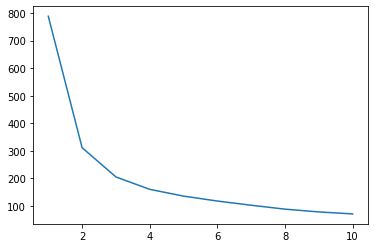

In [19]:
elbow_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(g_x)
    elbow_values.append([k, kmeans.inertia_])
elbow_df = pd.DataFrame(elbow_values, columns = ['K','Inertia'])
fig, ax = plt.subplots()
ax.plot(elbow_df['K'], elbow_df['Inertia'])

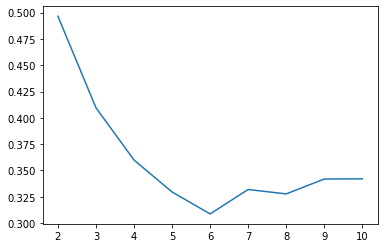

In [20]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(g_x)
    labels = kmeans.labels_
    sil_score = silhouette_score(g_x, labels)
    silhouette_scores.append([k, sil_score])
sil_df = pd.DataFrame(silhouette_scores, columns = ['K','Silhouette Score'])
fig, ax = plt.subplots()
ax.plot(sil_df['K'], sil_df['Silhouette Score'])